In [2]:
## Because it has 3 degree and 1 derivatives 
## hence the mi in the Hermite Interpolation will all equal to 1

In [3]:
using Polynomials
using PyPlot

INFO: Precompiling module BinDeps.
INFO: Precompiling module PyCall.
INFO: Precompiling module PyPlot.


In [4]:
function Lagrangeinside(n, i,a)
    L=Poly([1.0])
    for j=1:n
        if (j!=i)
            L=L*Poly([-a[j],1.0])/(a[i]-a[j])
        end
    end
    return L
end

Lagrangeinside (generic function with 1 method)

In [5]:
function Lagrangeoutside(y,n,x)
    L1=Poly([0])
    for i=1:n
        L1=L1+y[i]*Lagrangeinside(n,i,x)
    end
    return L1
end

Lagrangeoutside (generic function with 1 method)

In [6]:
function Hermiteinside(n,i,x,m,flag)
    L=Poly([1.0])
    for j=1:n
        if (j!=i)
            L=L*Poly([-x[j],1.0])/(x[i]-x[j])
        end
    end
    L=L^(1+m)
    if flag==0
    L=L*(1-Poly([-x[i],1]))
    end
    if flag==1
    L=L*Poly([-x[i],1])
    end
    return L
end

Hermiteinside (generic function with 1 method)

In [7]:
function Hermiteoutside(y,n,x,m)
    L1=Poly([0])
    for i=1:n
        for j=1:m+1
             p=(i-1)*2+j
             L1=L1+y[p]*Hermiteinside(n,i,x,m,j-1)
        end
    end
    println("The interpolation with no spine px= ",L1)
    x1=linspace(0,1,301)
    grid("on")
    plot(x1,L1(x1),label="Hermite,No Spine")
    plot(x,y1,"xb",label="spot")
    legend()
    title("Hermite Interpolation with 5 points and no Spine")
end


Hermiteoutside (generic function with 1 method)

In [84]:
function Clamp(y,n,x,dy)
a=ones(n)
b=ones(n)
c=ones(n)
d=ones(n)
h=ones(n)
alpha=ones(n)
FPO=dy[1]
FPN=dy[n]
for i=1:n
    a[i]=y1[i]
end
for i=1:n-1
    h[i]=x[i+1]-x[i]
end

    alpha[1]=3*(a[2]-a[1])/h[1]-3FPO
    alpha[n]=3FPN-3*(a[n]-a[n-1])/h[n-1]

for j=2:n-1
    alpha[j]=(3/h[j])*(a[j+1]-a[j])-(3/h[j-1])*(a[j]-a[j-1])
end
l=ones(n)
u=ones(n)
z=ones(n)
l[1]=2*h[1]
u[1]=0.5
z[1]=alpha[1]/l[1]
for i=2:n-1
    l[i]=2*(x[i+1]-x[i-1])-h[i-1]*u[i-1]
    u[i]=h[i]/l[i]
    z[i]=(alpha[i]-h[i-1]z[i-1])/l[i]
end
l[n]=h[n-1]*(2-u[n-1])
z[n]=(alpha[n]-h[n-1]z[n-1])/l[n]
c[n]=z[n]
for j=1:n-1
    c[n-j]=z[n-j]-u[n-j]*c[n-j+1]
    b[n-j]=(a[n-j+1]-a[n-j])/h[n-j]-h[n-j]*(c[n-j+1]+2*c[n-j])/3
    d[n-j]=(c[n-j+1]-c[n-j])/(3*h[n-j])
end
println("a=",a) 
println("b=",b)
println("c=",c)
println("d=",d)
println()
grid("on")
for i=1:4
    x1=linspace(x[i],x[i+1],101)
    Spine=a[i]+b[i]*Poly([-x[i],1])^1+c[i]*Poly([-x[i],1])^2+d[i]*Poly([-x[i],1])^3
    println("the ",i," interval spine function S=",Spine)
    dSpine= polyder(Spine)
    println("the ",i," interval dspine function S'=",dSpine)
    ddSpine= polyder(dSpine)
    println("the ",i," interval ddspine function S''=",ddSpine)
    println()
    plot(x1,Spine(x1))
    #plot(x1,dSpine(x1))   #just use to prove sth is right
    #plot(x1,ddSpine(x1))
end
plot(x,y1,"xb",label="spot")
legend()
title("Clamped cubic Spine Interpolation with 5 points ")
end

Clamp (generic function with 1 method)

In [85]:
#Save some Space for matix in Clamp
function ClampMatrix(y,n,x,dy)
a=ones(n)
b=ones(n)
c=ones(n)
d=ones(n)
h=ones(n)
for i=1:n
    a[i]=y1[i]
end
for i=1:n-1
    h[i]=x[i+1]-x[i]
end
A=zeros(n,n)
B=zeros(n,1)
A[1,1]=2*h[1]
A[1,2]=h[1]
B[1]=3/h[1]*(a[2]-a[1])-3*dy[1]
A[n,n]=2*h[n-1]
A[n,n-1]=h[n-1]
B[n]=3*dy[n]-3/h[n-1]*(a[n]-a[n-1])
for i=2:n-1
    A[i,i-1]=h[i-1]
    A[i,i]=2*(h[i-1]+h[i])
    A[i,i+1]=h[i]
    B[i]=3/h[i]*(a[i+1]-a[i])-3/h[i-1]*(a[i]-a[i-1])
end
c=inv(A)*B
for i=1:n-1
    b[i]=(a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
    d[i]=(c[i+1]-c[i])/(3*h[i])
end
println("a=",a) 
println("b=",b)
println("c=",c)
println("d=",d)
println()
grid("on")
for i=1:4
    x1=linspace(x[i],x[i+1],101)
    Spine=a[i]+b[i]*Poly([-x[i],1])^1+c[i]*Poly([-x[i],1])^2+d[i]*Poly([-x[i],1])^3
    println("the ",i," interval spine function S=",Spine)
    dSpine= polyder(Spine)
    println("the ",i," interval dspine function S'=",dSpine)
    ddSpine= polyder(dSpine)
    println("the ",i," interval ddspine function S''=",ddSpine)
    println()
    plot(x1,Spine(x1))
    #plot(x1,dSpine(x1))   #just use to prove sth is right
    #plot(x1,ddSpine(x1))
end
plot(x,y1,"xb",label="spot")
legend()
title("Clamped cubic Spine Interpolation with 5 points in Matrix Method ")
end

ClampMatrix (generic function with 1 method)

In [86]:
function Natural(y,n,x,dy)
a=ones(n)
b=ones(n)
c=ones(n)
d=ones(n)
h=ones(n)
alpha=ones(n+1)
FPO=dy[1]
FPN=dy[n]
for i=1:n
    a[i]=y1[i]
end
for i=1:n-1
    h[i]=x[i+1]-x[i]
end
alpha=ones(n+1)
FPO=dy[1]
FPN=dy[n]
for i=1:n
    a[i]=y1[i]
end
for j=2:n-1
    alpha[j-1]=(3/h[j])*(a[j+1]-a[j])-(3/h[j-1])*(a[j]-a[j-1])
end
l=ones(n)
u=ones(n)
z=ones(n)
l[1]=1
u[1]=0
z[1]=0
for i=2:n-1
    l[i]=2*(x[i+1]-x[i-1])-h[i-1]*u[i-1]
    u[i]=h[i]/l[i]
    z[i]=(alpha[i-1]-h[i-1]z[i-1])/l[i]
end
l[n]=1
z[n]=0
c[n]=0
for j=1:n-1
    c[n-j]=z[n-j]-u[n-j]*c[n-j+1]
    b[n-j]=(a[n-j+1]-a[n-j])/h[n-j]-h[n-j]*(c[n-j+1]+2*c[n-j])/3
    d[n-j]=(c[n-j+1]-c[n-j])/(3*h[n-j])
end
println("a=",a) 
println("b=",b)
println("c=",c)
println("d=",d)
println()
grid("on")
for i=1:4
    x1=linspace(x[i],x[i+1],101)
    Spine=a[i]+b[i]*Poly([-x[i],1])^1+c[i]*Poly([-x[i],1])^2+d[i]*Poly([-x[i],1])^3
    println("the ",i," interval spine function S=",Spine)
    dSpine= polyder(Spine)
    println("the ",i," interval dspine function S'=",dSpine)
    ddSpine= polyder(dSpine)
    println("the ",i," interval ddspine function S''=",ddSpine)
    println()
    plot(x1,Spine(x1))
    #plot(x1,dSpine(x1))   #just use to prove sth is right
    #plot(x1,ddSpine(x1))
end
plot(x,y1,"xb",label="spot")
legend()
title("Natural Cubic Spine Interpolation with 5 points in Normal Method")
end

Natural (generic function with 1 method)

In [87]:
#Save some Space for matix in Natural
function NaturalMatrix(y,n,x,dy)
a=ones(n)
b=ones(n)
c=ones(n)
d=ones(n)
h=ones(n)
for i=1:n
    a[i]=y1[i]
end
for i=1:n-1
    h[i]=x[i+1]-x[i]
end
A=zeros(n,n)
B=zeros(n,1)
A[1,1]=1
B[1]=0
A[n,n]=1
B[n]=0
for i=2:n-1
    A[i,i-1]=h[i-1]
    A[i,i]=2*(h[i-1]+h[i])
    A[i,i+1]=h[i]
    B[i]=3/h[i]*(a[i+1]-a[i])-3/h[i-1]*(a[i]-a[i-1])
end
c=inv(A)*B
for i=1:n-1
    b[i]=(a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
    d[i]=(c[i+1]-c[i])/(3*h[i])
end
println("a=",a) 
println("b=",b)
println("c=",c)
println("d=",d)
println()
grid("on")
for i=1:4
    x1=linspace(x[i],x[i+1],101)
    Spine=a[i]+b[i]*Poly([-x[i],1])^1+c[i]*Poly([-x[i],1])^2+d[i]*Poly([-x[i],1])^3
    println("the ",i," interval spine function S=",Spine)
    dSpine= polyder(Spine)
    println("the ",i," interval dspine function S'=",dSpine)
    ddSpine= polyder(dSpine)
    println("the ",i," interval ddspine function S''=",ddSpine)
    println()
    plot(x1,Spine(x1))
    #plot(x1,dSpine(x1))   just use to prove sth is right
    #plot(x1,ddSpine(x1))
end
plot(x,y1,"xb",label="spot")
legend()
title("Natural cubic Spine Interpolation with 5 points in Matrix Method ")
end

NaturalMatrix (generic function with 1 method)

In [88]:
function Hermite(x,n,y,dy)
grid("on")
for i=1:n-1
AS=[1 x[i]    (x[i])^2     (x[i])^3
    0 1       2*(x[i])   3*(x[i])^2
    1 x[i+1]  (x[i+1])^2   (x[i+1])^3
    0 1       2*x[i+1]     3*(x[i+1])^2
     ]
    bs=[y1[i],dy[i],y1[i+1],dy[i+1]]
    xs=inv(AS)*bs
    Spine=xs[1]+xs[2]*Poly([0,1])^1+xs[3]*Poly([0,1])^2+xs[4]*Poly([0,1])^3
    #println("the ",i," interval spine function S=",Spine)
    dSpine= polyder(Spine)
    println("the ",i," interval dspine function S'=",Spine)
    
    
    x1=linspace(x[i],x[i+1],101)
          
    plot(x1,Spine(x1))
    #plot(x1,dSpine(x1))
end
plot(x,y1,"xb",label="spot")
legend()
title("Hermite Interpolation with 5 points and Spine")
end

Hermite (generic function with 1 method)

In [89]:
#


#


#
#Save some space to the main part

In [90]:
n=5
m=1
degree=m+1
H=[Poly([1]),Poly([1]),Poly([1]),Poly([1]),Poly([1]),Poly([1])]
x=[0,0.25,0.5,0.75,1]
y=[0 1 0 0.25 0; 0 -0.5 -1 1 0]
y1=[0,1,0,0.25,0]
dy=[0 -0.5 -1 1 0]

1×5 Array{Float64,2}:
 0.0  -0.5  -1.0  1.0  0.0

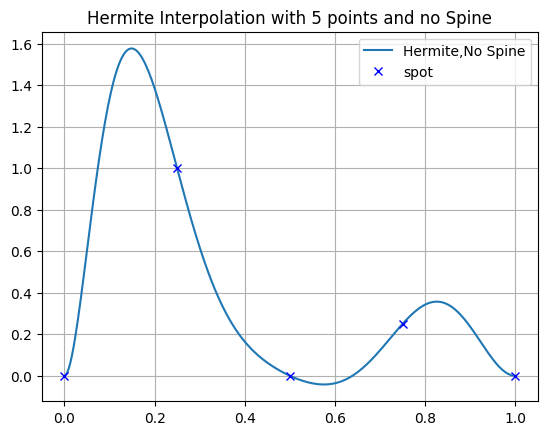

The interpolation with no spine px= Poly(415.11111111111114*x^2 - 4344.888888888888*x^3 + 19426.666666666664*x^4 - 47816.88888888889*x^5 + 69610.66666666666*x^6 - 59704.8888888889*x^7 + 27875.55555555556*x^8 - 5461.333333333333*x^9)


PyObject <matplotlib.text.Text object at 0x7f807dda6250>

In [91]:
Her=Hermiteoutside(y,n,x,m)

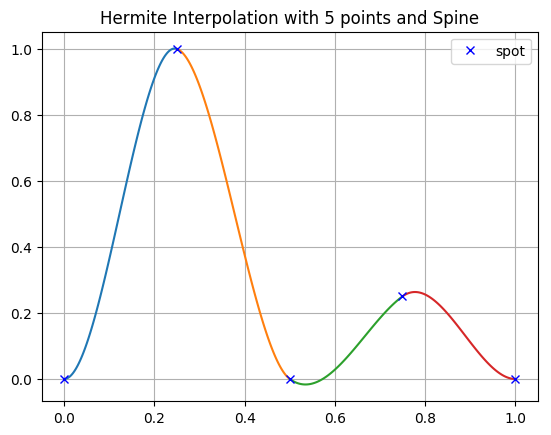

the 1 interval dspine function S'=Poly(50.0*x^2 - 136.0*x^3)
the 2 interval dspine function S'=Poly(-3.0 + 39.0*x - 118.0*x^2 + 104.0*x^3)
the 3 interval dspine function S'=Poly(8.5 - 41.0*x + 64.0*x^2 - 32.0*x^3)
the 4 interval dspine function S'=Poly(-32.0 + 112.0*x - 128.0*x^2 + 48.0*x^3)


PyObject <matplotlib.text.Text object at 0x7f807dcf3950>

In [92]:
Hermite(x,n,y,dy)

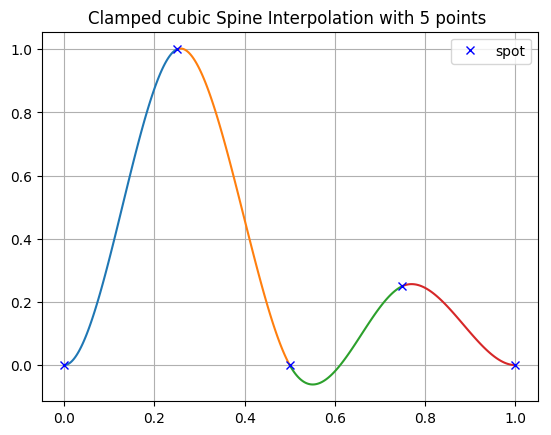

a=[0.0, 1.0, 0.0, 0.25, 0.0]
b=[-8.88178e-16, 0.642857, -2.57143, 0.642857, 1.0]
c=[45.4286, -42.8571, 30.0, -17.1429, 14.5714]
d=[-117.714, 97.1429, -62.8571, 42.2857, 1.0]

the 1 interval spine function S=Poly(-8.881784197001252e-16*x + 45.42857142857143*x^2 - 117.71428571428571*x^3)
the 1 interval dspine function S'=Poly(-8.881784197001252e-16 + 90.85714285714286*x - 353.1428571428571*x^2)
the 1 interval ddspine function S''=Poly(90.85714285714286 - 706.2857142857142*x)

the 2 interval spine function S=Poly(-3.3571428571428568 + 40.285714285714285*x - 115.71428571428572*x^2 + 97.14285714285715*x^3)
the 2 interval dspine function S'=Poly(40.285714285714285 - 231.42857142857144*x + 291.42857142857144*x^2)
the 2 interval ddspine function S''=Poly(-231.42857142857144 + 582.8571428571429*x)

the 3 interval spine function S=Poly(16.642857142857142 - 79.71428571428572*x + 124.28571428571429*x^2 - 62.85714285714286*x^3)
the 3 interval dspine function S'=Poly(-79.71428571428572 + 248.5714285

PyObject <matplotlib.text.Text object at 0x7f807dbef790>

In [93]:
Clamp(y,n,x,dy)

a=[0.0, 1.0, 0.0, 0.25, 0.0]
b=[4.44089e-16, 0.642857, -2.57143, 0.642857, 1.0]
c=[45.4286; -42.8571; 30.0; -17.1429; 14.5714]
d=[-117.714, 97.1429, -62.8571, 42.2857, 1.0]



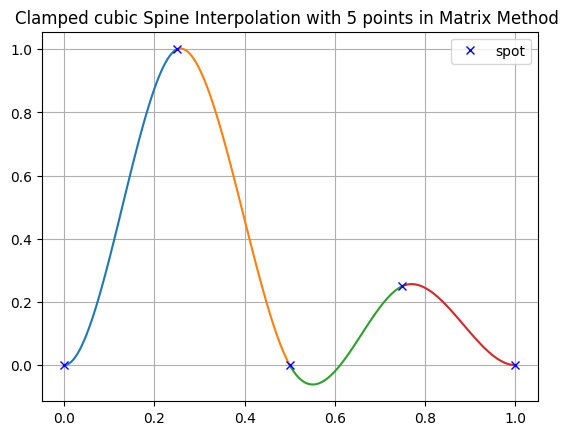

the 1 interval spine function S=Poly(4.440892098500626e-16*x + 45.42857142857142*x^2 - 117.71428571428571*x^3)
the 1 interval dspine function S'=Poly(4.440892098500626e-16 + 90.85714285714285*x - 353.1428571428571*x^2)
the 1 interval ddspine function S''=Poly(90.85714285714285 - 706.2857142857142*x)

the 2 interval spine function S=Poly(-3.3571428571428568 + 40.28571428571428*x - 115.7142857142857*x^2 + 97.14285714285712*x^3)
the 2 interval dspine function S'=Poly(40.28571428571428 - 231.4285714285714*x + 291.4285714285714*x^2)
the 2 interval ddspine function S''=Poly(-231.4285714285714 + 582.8571428571428*x)

the 3 interval spine function S=Poly(16.64285714285714 - 79.7142857142857*x + 124.28571428571428*x^2 - 62.857142857142854*x^3)
the 3 interval dspine function S'=Poly(-79.7142857142857 + 248.57142857142856*x - 188.57142857142856*x^2)
the 3 interval ddspine function S''=Poly(248.57142857142856 - 377.1428571428571*x)

the 4 interval spine function S=Poly(-27.714285714285715 + 97.714

PyObject <matplotlib.text.Text object at 0x7f807da4d850>

In [95]:
ClampMatrix(y,n,x,dy)

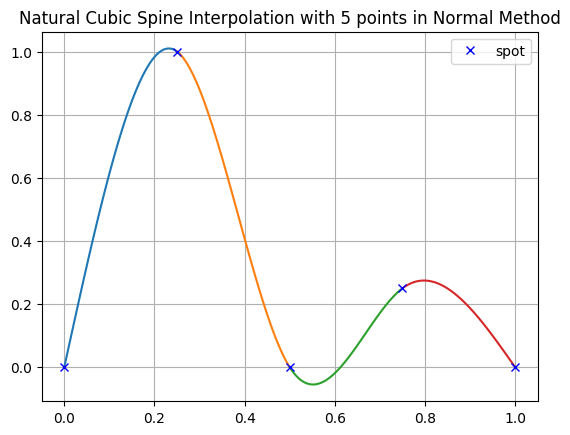

a=[0.0, 1.0, 0.0, 0.25, 0.0]
b=[6.53571, -1.07143, -2.25, 1.07143, 1.0]
c=[0.0, -30.4286, 25.7143, -12.4286, 0.0]
d=[-40.5714, 74.8571, -50.8571, 16.5714, 1.0]

the 1 interval spine function S=Poly(6.535714285714286*x - 40.57142857142857*x^3)
the 1 interval dspine function S'=Poly(6.535714285714286 - 121.71428571428571*x^2)
the 1 interval ddspine function S''=Poly(-243.42857142857142*x)

the 2 interval spine function S=Poly(-1.8035714285714284 + 28.178571428571427*x - 86.57142857142857*x^2 + 74.85714285714285*x^3)
the 2 interval dspine function S'=Poly(28.178571428571427 - 173.14285714285714*x + 224.57142857142856*x^2)
the 2 interval ddspine function S''=Poly(-173.14285714285714 + 449.1428571428571*x)

the 3 interval spine function S=Poly(13.910714285714285 - 66.10714285714285*x + 101.99999999999999*x^2 - 50.857142857142854*x^3)
the 3 interval dspine function S'=Poly(-66.10714285714285 + 203.99999999999997*x - 152.57142857142856*x^2)
the 3 interval ddspine function S''=Poly(203.9999999

PyObject <matplotlib.text.Text object at 0x7f807ea5a110>

In [42]:
Natural(y,n,x,dy)

a=

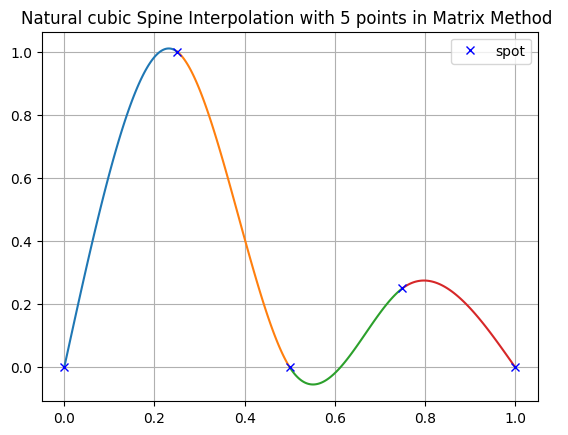

[0.0, 1.0, 0.0, 0.25, 0.0]
b=[6.53571, -1.07143, -2.25, 1.07143, 1.0]
c=[0.0; -30.4286; 25.7143; -12.4286; 0.0]
d=[-40.5714, 74.8571, -50.8571, 16.5714, 1.0]

the 1 interval spine function S=Poly(6.535714285714286*x - 40.57142857142857*x^3)
the 1 interval dspine function S'=Poly(6.535714285714286 - 121.71428571428571*x^2)
the 1 interval ddspine function S''=Poly(-243.42857142857142*x)

the 2 interval spine function S=Poly(-1.8035714285714284 + 28.178571428571427*x - 86.57142857142857*x^2 + 74.85714285714285*x^3)
the 2 interval dspine function S'=Poly(28.178571428571427 - 173.14285714285714*x + 224.57142857142856*x^2)
the 2 interval ddspine function S''=Poly(-173.14285714285714 + 449.1428571428571*x)

the 3 interval spine function S=Poly(13.910714285714286 - 66.10714285714286*x + 102.0*x^2 - 50.85714285714286*x^3)
the 3 interval dspine function S'=Poly(-66.10714285714286 + 204.0*x - 152.57142857142858*x^2)
the 3 interval ddspine function S''=Poly(204.0 - 305.14285714285717*x)

the 4 int

PyObject <matplotlib.text.Text object at 0x7f1388b2fa90>

In [133]:
NaturalMatrix(y,n,x,dy)